In [29]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [30]:
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
df = pd.read_csv("C:/Users/STUDENT/Downloads/spam.csv", encoding='latin1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

In [31]:
# Head
print("Dataset Head:")
print(df.head())

Dataset Head:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [32]:
# Add Features
df['msg_len'] = df['message'].apply(len)
df['punct_count'] = df['message'].apply(lambda x: sum([1 for c in x if c in string.punctuation]))
df['word_count'] = df['message'].apply(lambda x: len(x.split()))


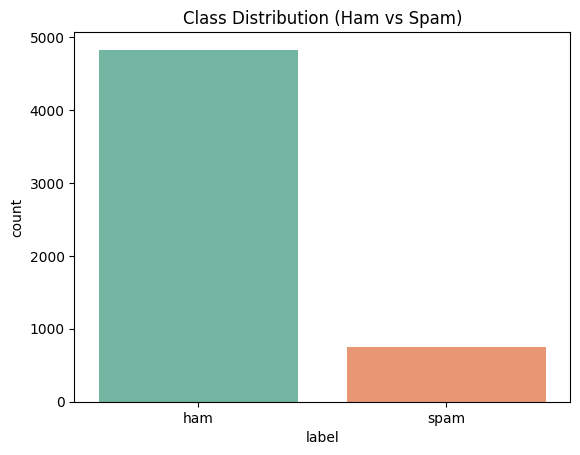

In [33]:
# Class Distribution
sns.countplot(x='label', data=df, palette='Set2')
plt.title("Class Distribution (Ham vs Spam)")
plt.show()


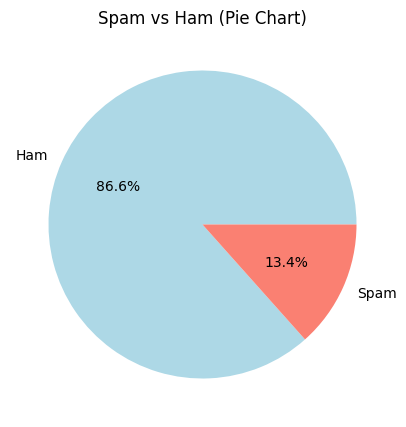

In [34]:
# Pie Chart
plt.figure(figsize=(5,5))
df['label'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Ham', 'Spam'], colors=['lightblue', 'salmon'])
plt.title("Spam vs Ham (Pie Chart)")
plt.ylabel("")
plt.show()

In [35]:
# List top spam words from Logistic Regression
def list_top_spam_words(model, vectorizer, top_n=20):
    feature_names = vectorizer.get_feature_names_out()
    coefs = model.coef_[0]
    
    # Get top N highest coefficients (most spam-indicative)
    top_spam_indices = np.argsort(coefs)[-top_n:]
    print(f"Top {top_n} Words That Strongly Indicate SPAM:\n")
    for i in reversed(top_spam_indices):
        print(f"{feature_names[i]:<15} ➤ {coefs[i]:.4f}")

# Run it
list_top_spam_words(models['Logistic Regression'], tfidf)


Top 20 Words That Strongly Indicate SPAM:

txt             ➤ 4.7540
uk              ➤ 3.5914
mobile          ➤ 3.4615
claim           ➤ 3.4520
www             ➤ 3.3235
service         ➤ 3.1850
reply           ➤ 3.0906
stop            ➤ 3.0697
150p            ➤ 3.0164
free            ➤ 2.8774
text            ➤ 2.6673
50              ➤ 2.5135
won             ➤ 2.4655
prize           ➤ 2.4297
urgent          ➤ 2.4197
com             ➤ 2.4018
win             ➤ 2.3521
new             ➤ 2.3091
cash            ➤ 2.1336
chat            ➤ 2.0506


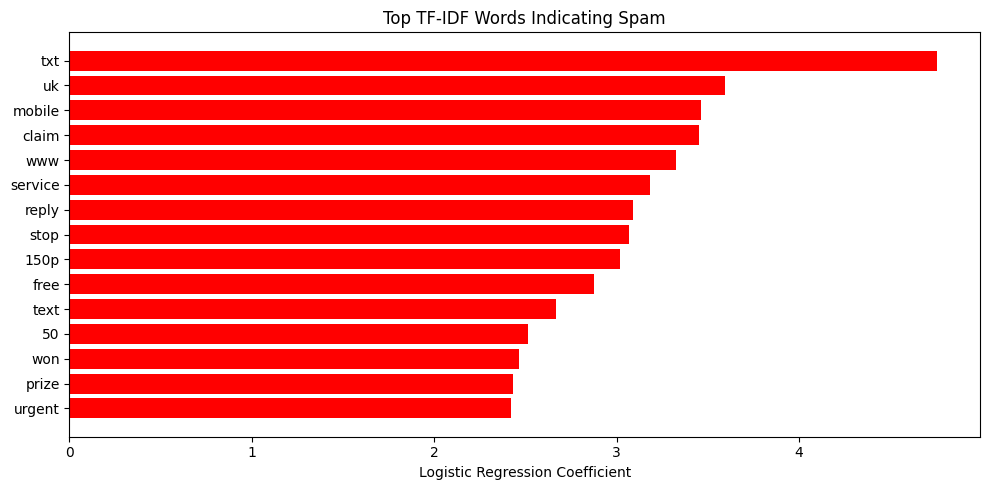

In [36]:
def plot_top_spam_words(model, vectorizer, top_n=15):
    feature_names = vectorizer.get_feature_names_out()
    coefs = model.coef_[0]
    top_spam_idx = np.argsort(coefs)[-top_n:]

    plt.figure(figsize=(10, 5))
    plt.barh([feature_names[i] for i in top_spam_idx], coefs[top_spam_idx], color='red')
    plt.title("Top TF-IDF Words Indicating Spam")
    plt.xlabel("Logistic Regression Coefficient")
    plt.tight_layout()
    plt.show()

plot_top_spam_words(models['Logistic Regression'], tfidf)


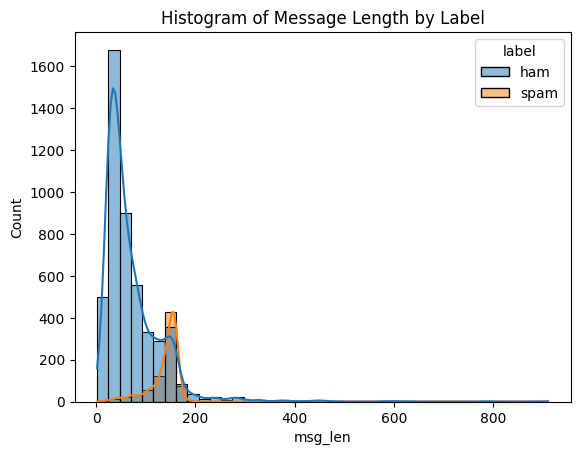

In [37]:
# Histogram of Message Length
sns.histplot(data=df, x='msg_len', hue='label', kde=True, bins=40)
plt.title("Histogram of Message Length by Label")
plt.show()

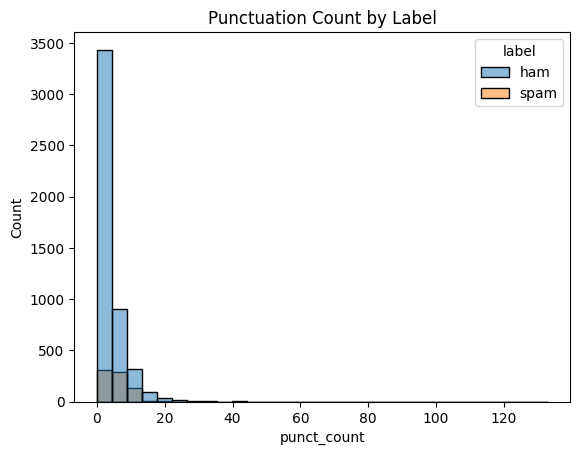

In [38]:
# Histogram of Punctuation Count
sns.histplot(data=df, x='punct_count', hue='label', bins=30, kde=False)
plt.title("Punctuation Count by Label")
plt.show()


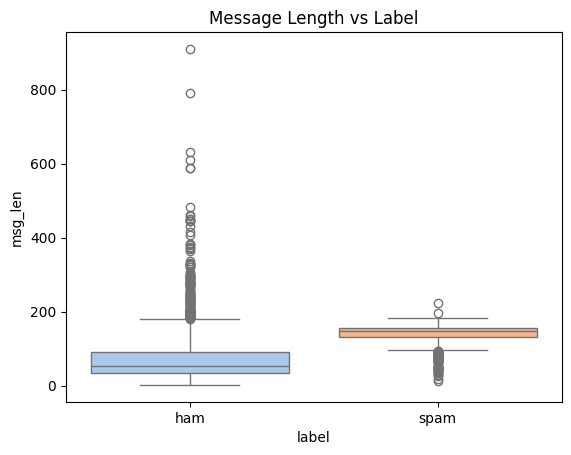

In [39]:
# Boxplot
sns.boxplot(x='label', y='msg_len', data=df, palette='pastel')
plt.title("Message Length vs Label")
plt.show()

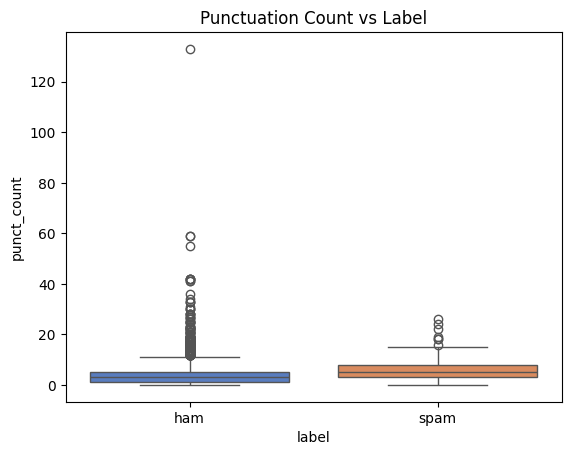

In [40]:
sns.boxplot(x='label', y='punct_count', data=df, palette='muted')
plt.title("Punctuation Count vs Label")
plt.show()

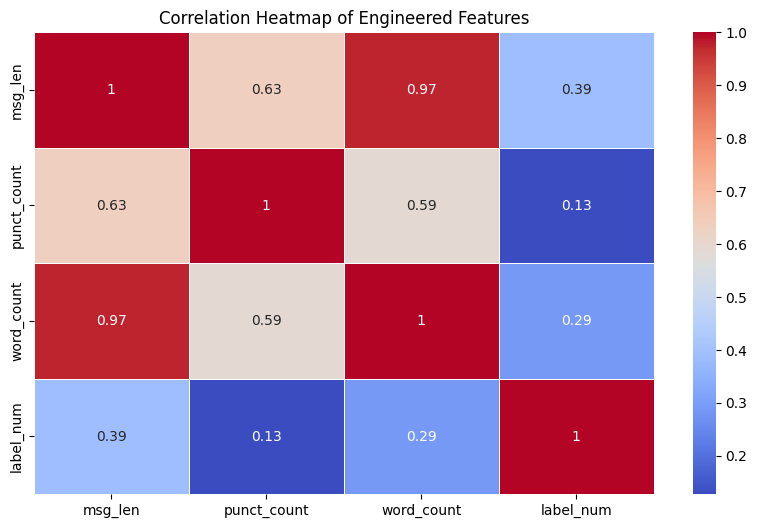

In [41]:
# Correlation Heatmap
df_num = df[['msg_len', 'punct_count', 'word_count']]
df_num['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
plt.figure(figsize=(10, 6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Engineered Features")
plt.show()

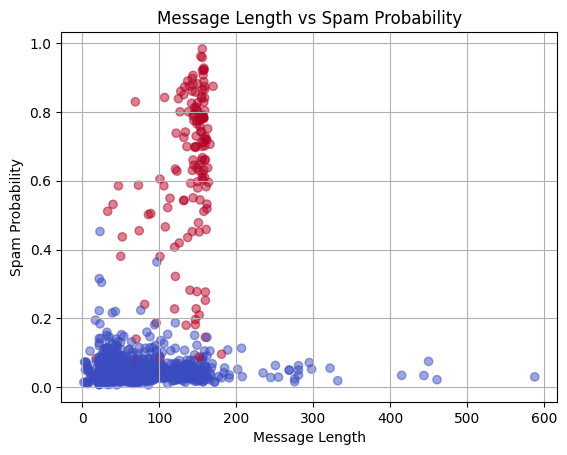

In [42]:
proba = models['Logistic Regression'].predict_proba(X_test)[:, 1]
lengths = df.loc[y_test.index, 'msg_len']

plt.scatter(lengths, proba, alpha=0.5, c=y_test, cmap='coolwarm')
plt.xlabel("Message Length")
plt.ylabel("Spam Probability")
plt.title("Message Length vs Spam Probability")
plt.grid(True)
plt.show()


In [43]:
# Preprocessing
X = df['message']
y = df['label'].map({'ham': 0, 'spam': 1})

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_tfidf = tfidf.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=42)


Naive Bayes - Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       0.99      0.82      0.90       149

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



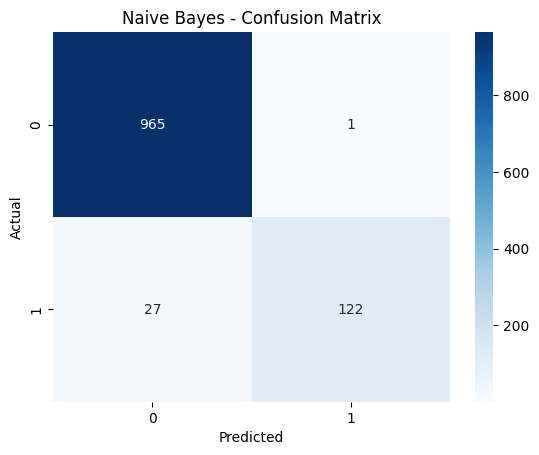

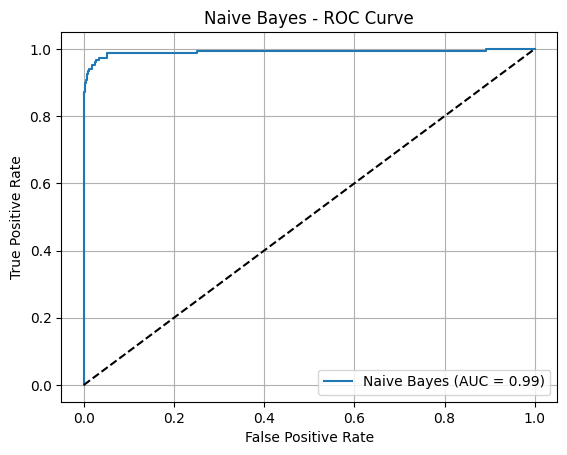


Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



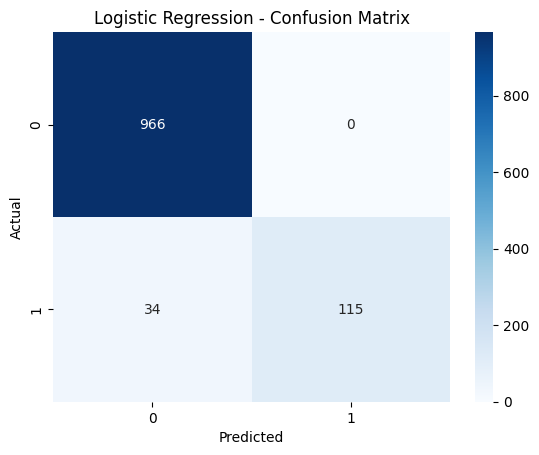

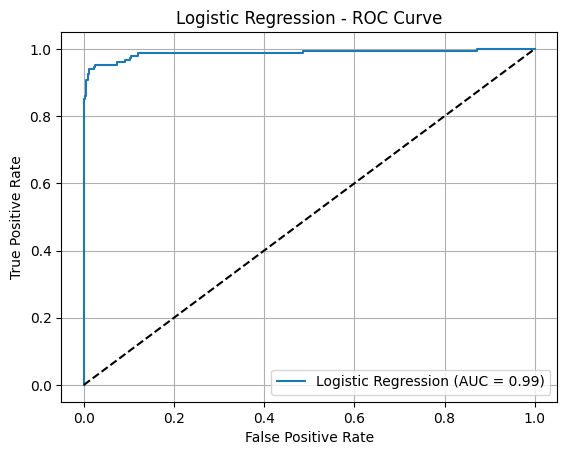


SVM - Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.88      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



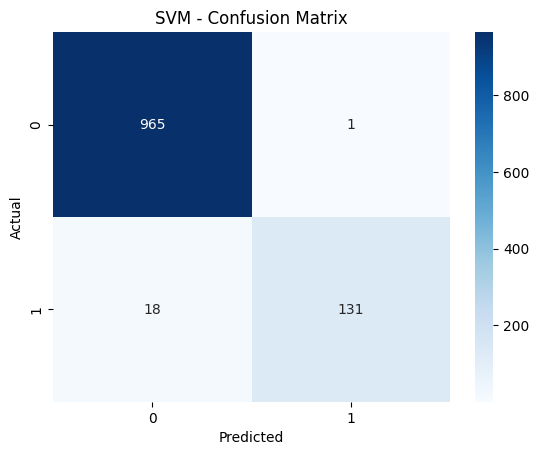

In [44]:
# Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} - Classification Report")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    # ROC Curve (for models with probability output)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)

        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f"{name} - ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.grid()
        plt.show()
